In [5]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier #랜덤포레스트라는 분류기를 사용하기 위해 import
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pylab as plt
import pandas as pd 
import seaborn as sns


https://datascienceschool.net/03%20machine%20learning/09.01%20%EB%B6%84%EB%A5%98%EC%9A%A9%20%EC%98%88%EC%A0%9C%20%EB%8D%B0%EC%9D%B4%ED%84%B0.html

In [4]:
wine = load_wine()
print(wine.keys())
print(wine.DESCR)
print(wine.data.shape)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:     

와인의 화학 조성을 사용하여 와인의 종류 분류하는 문제이다 
<br>
</br>  

**타겟 데이터**  
        -  와인의 종류 0, 1, 2의 세가지 값

<br>
</br>  

**특징 데이터**

알콜(Alcohol)

말산(Malic acid)

회분(Ash)

회분의 알칼리도(Alcalinity of ash)

마그네슘(Magnesium)

총 폴리페놀(Total phenols)

플라보노이드 폴리페놀(Flavanoids)

비 플라보노이드 폴리페놀(Nonflavanoid phenols)

프로안토시아닌(Proanthocyanins)

색상의 강도(Color intensity)

색상(Hue)

희석 와인의 OD280/OD315 비율 (OD280/OD315 of diluted wines)

프롤린(Proline)

In [4]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [5]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [7]:
# 시각화 하기 분류해야하는거 DataFrame에 넣기 

wine_df = pd.DataFrame(wine.data,columns=wine.feature_names)
wine_result = pd.Series(wine.target,dtype="category")
wine_result = wine_result.cat.rename_categories(wine.target_names)
wine_df["Target wine"] = wine_result
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target wine
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


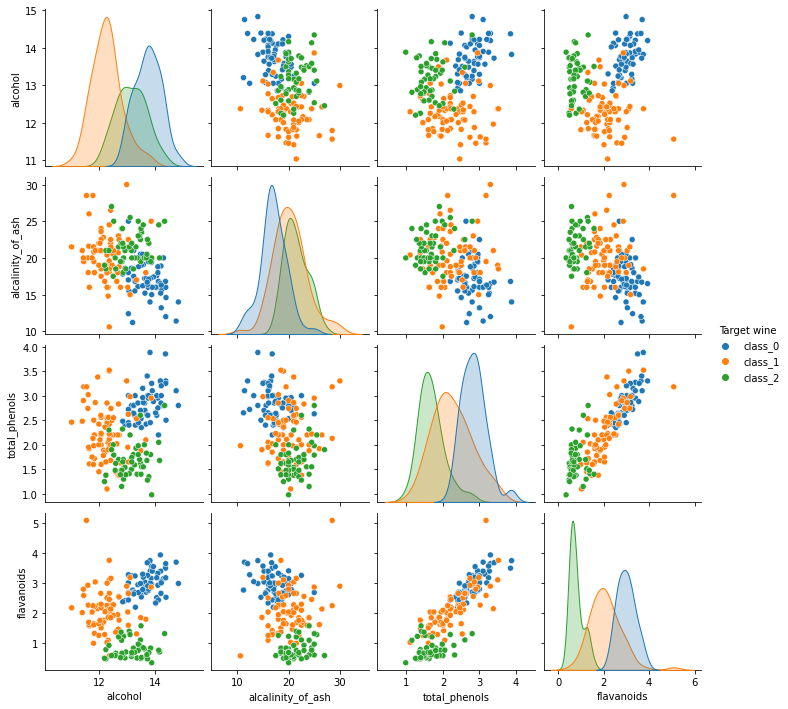

In [9]:
sns.pairplot(vars=["alcohol", "alcalinity_of_ash", "total_phenols", "flavanoids"], 
             hue="Target wine", data=wine_df)
plt.show()

In [10]:
X,y=load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=9)
print('X_train 개수: ', len(X_train),', X_test 개수: ', len(X_test))
# len은 배열의 길이를 출력

X_train 개수:  142 , X_test 개수:  36


### logisticregresion 적용 및 표준화 정규화 성능 비교 하기 


In [13]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# 정규화 + logistic
model = make_pipeline(MinMaxScaler(),LogisticRegression())
model.fit(X_train,y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('logisticregression', LogisticRegression())])

In [14]:
print("학습 데이터 점수: {} ".format(model.score(X_train,y_train)))
print("평가 데이터 점수: {} ".format(model.score(X_test,y_test)))

학습 데이터 점수: 0.9859154929577465 
평가 데이터 점수: 0.9722222222222222 


In [16]:
# 표준화 + logistic
X,y=load_wine(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=9)
model = make_pipeline(StandardScaler(),LogisticRegression())
model.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [17]:
print("학습 데이터 점수: {} ".format(model.score(X_train,y_train)))
print("평가 데이터 점수: {} ".format(model.score(X_test,y_test)))

학습 데이터 점수: 1.0 
평가 데이터 점수: 0.9722222222222222 


### 정규화 보다 표준화 했을때 훈련 데이터 성능이 더 좋았다 
### 성능 평가 

- recall,acuur,predict,f1_score + 오차 행렬 까지 좋은 성능결과가 나온다 
- cross_val_score 
- classification_report(y_test, y_pred)

In [19]:
predict = model.predict(X_test)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        17
           1       0.92      1.00      0.96        11
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



In [21]:
# 오차 행렬 
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_test,y_pred=predict)

print(confmat)

[[16  1  0]
 [ 0 11  0]
 [ 0  0  8]]


In [22]:
# cross val score 했을때 성능 평가 

from sklearn.model_selection import cross_val_score,cross_validate
import numpy as np

X,y=load_wine(return_X_y=True)  #표준화 포함한 model이다 
scores = cross_val_score(model,X,y,cv=10)
print("교차검증 정확도: {}".format(scores))
print("교차검증 정확도 평균: {}".format(np.mean(scores)))

교차검증 정확도: [0.94444444 0.94444444 1.         0.94444444 1.         1.
 1.         1.         1.         1.        ]
교차검증 정확도 평균: 0.9833333333333332


In [23]:
# stratified k fold 
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10,shuffle=True)
scores_skf = cross_val_score(model,X,y,cv=skf)
print("StratifiedKFold 정확도: {}".format(scores_skf))
print("StratifiedKFold 정확도 평균: {}".format(np.mean(scores_skf)))

StratifiedKFold 정확도: [1.         1.         1.         0.94444444 1.         0.94444444
 1.         0.94444444 1.         1.        ]
StratifiedKFold 정확도 평균: 0.9833333333333334


### StratifiedKFold ,cross_val_score 둘다 비슷한 평가 점수이다 

In [27]:
# 최적의 파라미터 구하기 GrideSearchCV
from sklearn.model_selection import GridSearchCV
import multiprocessing
X,y=load_wine(return_X_y=True)
param_grid = {"penalty":["l1", "l2", "elasticnet", "none"],
             "C":[0.1,0.2,1.0,2.0,5.0,10.0,100.0],
              "max_iter":[100,3000,5,500,1000],
             "solver":["newton-cg", "lbfgs", "liblinear", "sag", "saga"]}

gs = GridSearchCV(estimator=LogisticRegression(),param_grid=param_grid,cv=10,
                  n_jobs=multiprocessing.cpu_count())

gs

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=16,
             param_grid={'C': [0.1, 0.2, 1.0, 2.0, 5.0, 10.0, 100.0],
                         'max_iter': [100, 3000, 5, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [28]:
result = gs.fit(X,y)

C:\Users\maeng\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.95              nan 0.6869281  0.95555556
 0.95       0.94444444 0.70424837 0.69248366        nan        nan
        nan        nan        nan 0.92156863 0.95555556        nan
 0.70424837 0.69248366        nan        nan 0.95              nan
 0.83856209 0.95555556 0.95555556 0.94444444 0.91666667 0.85555556
        nan        nan        nan        nan        nan 0.92156863
 0.92156863        nan 0.91666667 0.85555556        nan        nan
 0.94444444        nan 0.59640523 0.65882353 0.60784314 0.65849673
 0.59640523 0.5630719         nan        nan        nan        nan
        nan 0.65882353 0.60784314        nan 0.6248366  0.60751634
        nan        nan 0.95              nan 0.72647059 0.95555556
 0.95       0.94444444 0.79411765 0.7379085         nan        nan
        nan        nan        nan 0.92156863 0.921568

In [29]:
print(gs.best_estimator_)
print("최적의 점수 {}".format(gs.best_score_))
print("최적의 파라미터 {}".format(gs.best_params_))


LogisticRegression(solver='newton-cg')
최적의 점수 0.9666666666666666
최적의 파라미터 {'C': 1.0, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


## SGDClassifier() 보기 

In [35]:
from sklearn.linear_model import SGDClassifier
X,y=load_wine(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=9)

In [36]:
model = make_pipeline(StandardScaler(),SGDClassifier(shuffle=True))
model.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

In [37]:
print("학습 데이터 점수: {} ".format(model.score(X_train,y_train)))
print("평가 데이터 점수: {} ".format(model.score(X_test,y_test)))


학습 데이터 점수: 1.0 
평가 데이터 점수: 1.0 


In [42]:
#Grid search 해보기 SGDClassifier() 파라미터 설정하기 
param_grid = {"loss":["log","hinge","modified_huber"],
              "penalty":["l1", "l2", "elasticnet"],
              "max_iter":[200,3000,5,500,1000],
              "shuffle":[True,False],
              "alpha":[0.0001,0.001,0.1,0.00001,1.0,2.0]
             }

gs = GridSearchCV(estimator=SGDClassifier(),param_grid=param_grid,cv=10,
                  n_jobs=multiprocessing.cpu_count())



In [48]:
result = gs.fit(X,y)

In [47]:
print("최적 점수 {}".format(result.best_score_))
print("최적 파라미터 {}".format(result.best_params_))

최적 점수 0.77
최적 파라미터 {'alpha': 0.1, 'loss': 'log', 'max_iter': 3000, 'penalty': 'l1', 'shuffle': False}


In [45]:
result.best_estimator_

SGDClassifier(loss='modified_huber', max_iter=3000, penalty='l1')

In [7]:
# decision tree
decision_tree = DecisionTreeClassifier(random_state=32)

In [8]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=32)

In [9]:
y_pred = decision_tree.predict(X_test)
y_pred

array([2, 0, 2, 2, 1, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1,
       1, 1, 0, 2, 1, 2, 2, 2, 1, 0, 2, 1, 1, 1])

In [10]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9444444444444444

In [11]:
#random foreset

random_forest = RandomForestClassifier(random_state=32)

In [12]:
random_forest.fit(X_train, y_train) # 훈련
y_pred = random_forest.predict(X_test) # 예측

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [14]:
#SVM
svm_model = svm.SVC() # 모델 객체를 만든다.
svm_model.fit(X_train, y_train) # 훈련
y_pred = svm_model.predict(X_test) # 예측


# 와인 데이터 회고 

와인의 화학 조성을 사용하여 와인의 종류 분류하는 문제이다

타겟 데이터
- 와인의 종류 0, 1, 2의 세가지 값



특징 데이터

알콜(Alcohol)

말산(Malic acid)

회분(Ash)

회분의 알칼리도(Alcalinity of ash)

마그네슘(Magnesium)

총 폴리페놀(Total phenols)

플라보노이드 폴리페놀(Flavanoids)

비 플라보노이드 폴리페놀(Nonflavanoid phenols)

프로안토시아닌(Proanthocyanins)

색상의 강도(Color intensity)

색상(Hue)

희석 와인의 OD280/OD315 비율 (OD280/OD315 of diluted wines)

프롤린(Proline)

의 내용이 있다 


정규화 보다 표준화 했을때 훈련 데이터에 대해서는 성능이 더 좋았다  표준화 하고 모델을 logistic을 사용했을때 cross val score를 하면 성능이 높게 평가 되었다 
grideSearch CV 로 최적의 파라미터를 찾아 보았따 성능이 일반 로지스틱 함수 돌릴때보다 낮았다 아무래도 파라미터 설정 범위를 임의로 해서 그런것 같다 
C 규제 값이 그렇게 높지 않은것을 보면 훈련 데이터에 대한 신뢰성이 그렇게 높은 편은 아닌것을 알수있다 하지만 성능은 좋게 평가 되었다 

SGDClasiifier로 model 만들고 표준화 진행하면 훈련 데이터 평가 데이터 모두 좋은 성능 평가를 볼수있었다 
SGDClassifier 또한 gridSearchCV로 최적의 파라미터 찾으려 했는데 내가 설정한 파라미터 범위가 이상한건지 성능이 다른 모델에 비해 
낮게 평가 되었다 이 문제의 원인이 무엇인지는 잘 모르겠다 

SVM ,decision tree의 경우는 이후에 업데이트 할 예정이고 추가로 모르는 부분도 해결 하면 업데이트 하겠다 